In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ours = pd.read_csv('call_finish-Copy1.csv')
graph = pd.read_csv('기준금리(forGraph).csv')


# 우리 데이터 감성지수

In [2]:
ours = ours.loc[:, ['date', 'tone']]
ours = ours.set_index('date')
ours.head()

,tone
date,
2005-06-09,1.000000
2005-07-07,-1.000000
2005-08-11,0.428571
2005-09-08,-0.333333
2005-10-11,0.000000


# 기준금리

In [4]:
graph = graph.loc[:,['date', 'basemoney']]
graph = graph.set_index('date')
graph.head()

,basemoney
date,
2005-01-01,3.25
2005-01-02,3.25
2005-01-03,3.25
2005-01-04,3.25
2005-01-05,3.25


# 병합

In [69]:
forgraph = ours.merge(graph, on='date', how='inner')

forgraph

forgraph['tone'] = forgraph['tone'].fillna(method='ffill')
forgraph.tail()

,date,tone,basemoney
81,2017-05-25,-0.255814,1.25
82,2017-07-13,0.178947,1.25
83,2017-08-31,0.217391,1.25
84,2017-10-19,0.191919,1.25
85,2017-11-30,0.000000,1.50


In [70]:
forgraph = forgraph.reset_index(drop =True)

In [71]:
forgraph.tail()

,date,tone,basemoney
81,2017-05-25,-0.255814,1.25
82,2017-07-13,0.178947,1.25
83,2017-08-31,0.217391,1.25
84,2017-10-19,0.191919,1.25
85,2017-11-30,0.000000,1.50



# MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
# MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환
참조: 4조

In [72]:
from sklearn import preprocessing

forgraph['basemoney']=preprocessing.MinMaxScaler().fit_transform(forgraph['basemoney'].values.reshape(-1,1))
forgraph['tone']=preprocessing.MinMaxScaler().fit_transform(forgraph['tone'].values.reshape(-1,1))



# -1 또는 1의 값으로 변환
### 최대값이 1일때 -0.5 = 0.5 -> 0.5 * 1 = 1


In [73]:
forgraph['basemoney'] = forgraph['basemoney']-0.5
forgraph['basemoney'] = forgraph['basemoney'] *2

In [74]:
forgraph['tone'] = forgraph['tone'] - 0.5
forgraph['tone'] = forgraph['tone'] *2

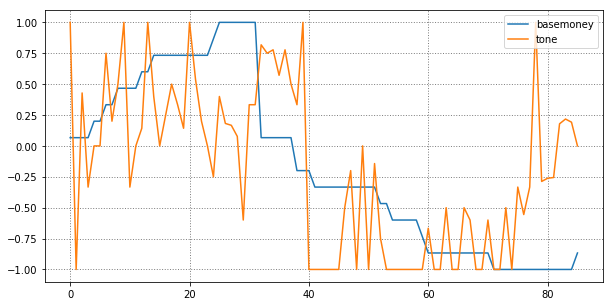

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(forgraph['basemoney'])
plt.plot(forgraph['tone'])

plt.legend(loc=0)
plt.grid(True, color='0.5', linestyle=':', linewidth=1)